# <h1 align = "center">INF3721 : APPRENTISSAGE SUPERVISEE ET NON SUPERVISEE I</h1>
# <h1 align = "center">TP1 PERCEPTRON MULTI-COUCHE: MLP</h1>
<span>Universite de yaounde 1 </span><br>
<span>Departement informatique </span><br>
<span>Licence 3 Data science </span><br>
<table align="center">
  <thead>
    <tr>
      <th>Noms</th>
      <th>Prenoms</th>
      <th>Matricule</th>
    </tr>
  </thead>
  <tbody bgcolor='green' align='center'>
    <tr>
      <td>LONTSI LAMBOU</td>
      <td>RONALDINO</td>
      <td>21T2271</td>
    </tr>
    <tr>
      <td>NDONKOU</td>
      <td>FRANCK</td>
      <td>21T2254</td>
    </tr>
     <tr>
      <td>TCHIAZE FOUOSSO</td>
      <td>ROMERO</td>
      <td>21T2474</td>
    </tr>
     <tr>
      <td>DJAMPA NJUITCHA</td>
      <td>ANICET</td>
      <td>21T2692</td>
    </tr>
  </tbody>
</table>

# <h3 align = "center">Importation des bibliotheques</h3>

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

# <h3 align = "center">Réglage des paramètres graphiques</h3>

In [ ]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

# <h3 align = "center">Fixer la graine pour rendre l'entraînement déterministe.</h3>

In [ ]:
SEED_VALUE = 42

# Fix seed to make training deterministic.

In [ ]:
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# <h3 align = "center">chargement des donnees.</h3>

In [ ]:
(X_train_all, y_train_all), (X_test, y_test) = cifar10.load_data()

In [ ]:
nbre_classes = 10 # le nombre de classes
epochs = 100 # nombre d'itérations sur les données
batch_size = 256 
from keras.utils import to_categorical


# <h3 align = "center">séparation des données en données d'entraînement, de validation et de test.</h3>

In [ ]:
X_train_all = X_train_all.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

# <h3 align = "center">visualisation de quelques données </h3>

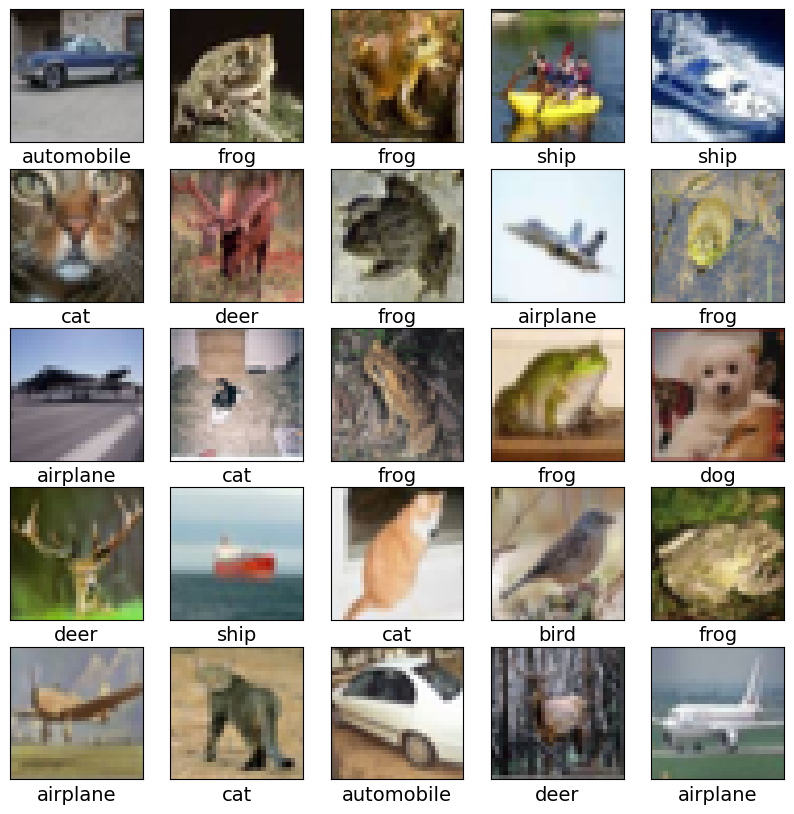

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# <h3 align = "center">Mise en forme des données pour le modèle MLP </h3>

In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_valid = X_valid.reshape((X_valid.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))


 <h3 align = "center">Conversion des étiquettes en one-hot encoding</h3>

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# <h3 align = "center">Instantiation du modèle</h3>

In [ ]:
model = models.Sequential([
    layers.Dense(200, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dense(200, activation='tanh'),
    layers.Dense(300, activation='sigmoid'),
    layers.Dense(300, activation='relu'),
     layers.Dense(200, activation='tanh'),
    layers.Dense(300, activation='sigmoid'),
    layers.Dense(10, activation='softmax')])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 300)               60300     
                                                                 
 dense_6 (Dense)             (None, 10)                3

# <h3 align = "center">Compilation du modèle</h3>

In [ ]:
# Compiler le modèle en utilisant l'optimiseur SGD
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# <h3 align = "center">Entraînement du modèle</h3>

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10000, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/100
4/4 [==============================] - 3s 312ms/step - loss: 2.3625 - accuracy: 0.0992 - val_loss: 2.3213 - val_accuracy: 0.1016
Epoch 2/100
4/4 [==============================] - 1s 238ms/step - loss: 2.3058 - accuracy: 0.1132 - val_loss: 2.2873 - val_accuracy: 0.1577
Epoch 3/100
4/4 [==============================] - 1s 232ms/step - loss: 2.2731 - accuracy: 0.1559 - val_loss: 2.2334 - val_accuracy: 0.1578
Epoch 4/100
4/4 [==============================] - 1s 225ms/step - loss: 2.1994 - accuracy: 0.1686 - val_loss: 2.1376 - val_accuracy: 0.1729
Epoch 5/100
4/4 [==============================] - 1s 231ms/step - loss: 2.1249 - accuracy: 0.1847 - val_loss: 2.0907 - val_accuracy: 0.2041
Epoch 6/100
4/4 [==============================] - 1s 211ms/step - loss: 2.0913 - accuracy: 0.2037 - val_loss: 2.0591 - val_accuracy: 0.2195
Epoch 7/100
4/4 [==============================] - 1s 214ms/step - loss: 2.0662 - accuracy: 0.2199 - val_loss: 2.0546 - val_accuracy: 0.2224
Epoch 8/100
4


# <h3 align = "center">fonction pour afficher les Résultats de l'entraînement</h3>

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()    



# <h3 align = "center">Résultats de l'entraînement</h3>

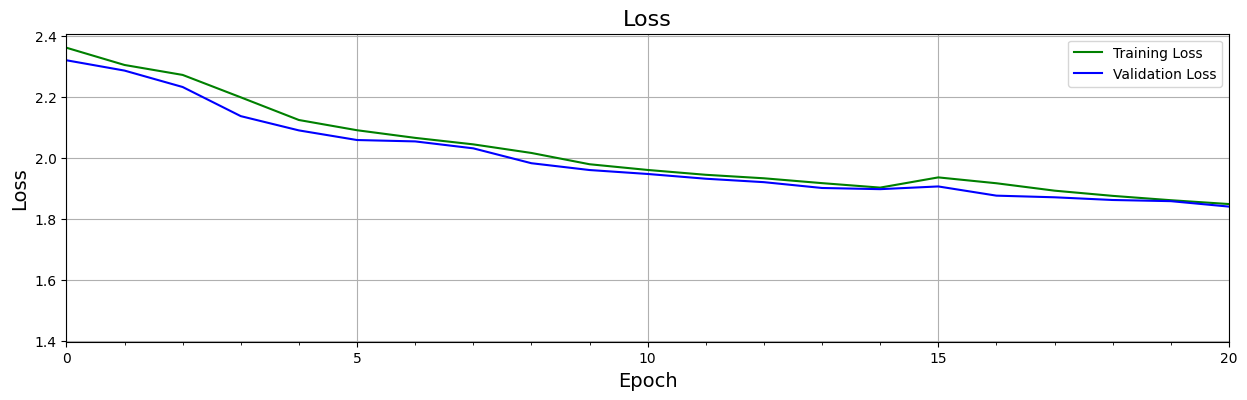

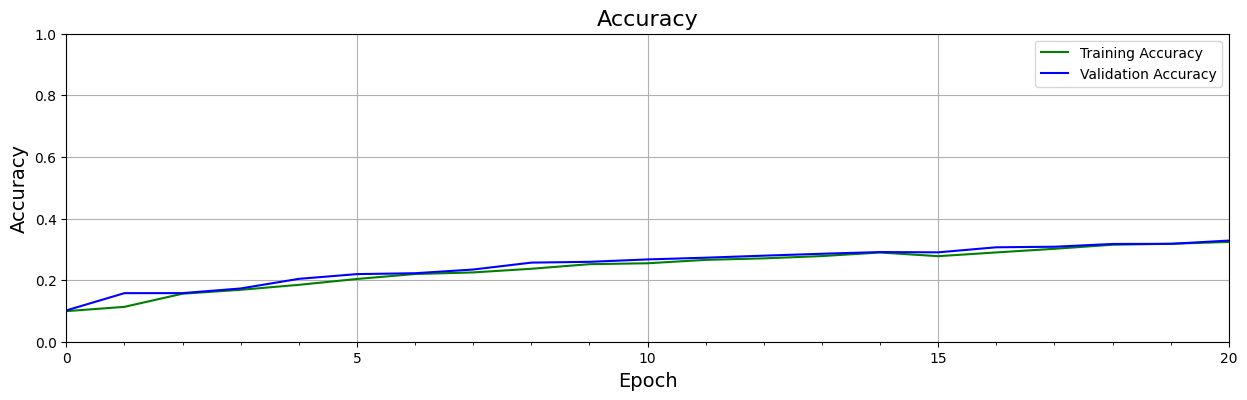

In [ ]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([train_loss, valid_loss],        
            title="Loss", 
            ylabel="Loss", 
            ylim=None,
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"])

plot_results([train_acc, valid_acc], 
            title="Accuracy",
            ylabel="Accuracy",
            ylim=[0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# <h3 align = "center">Génération des prédictions pour l'ensemble de test</h3>

In [ ]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ', np.argmax(y_test[index]))
print('\n')
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

313/313 [==============================] - 3s 8ms/step
Ground truth for test digit:  3


Predictions for each class:

digit: 0  probability:  0.036467336
digit: 1  probability:  0.021021567
digit: 2  probability:  0.114096574
digit: 3  probability:  0.3660646
digit: 4  probability:  0.05010505
digit: 5  probability:  0.24629655
digit: 6  probability:  0.12260688
digit: 7  probability:  0.006187841
digit: 8  probability:  0.031579945
digit: 9  probability:  0.0055736746


# <h3 align = "center">Calcul de la précision du modèle</h3>

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 46.06%


# <h3 align = "center">Affichage de la matrice de confusion sous forme de heatmap</h3>

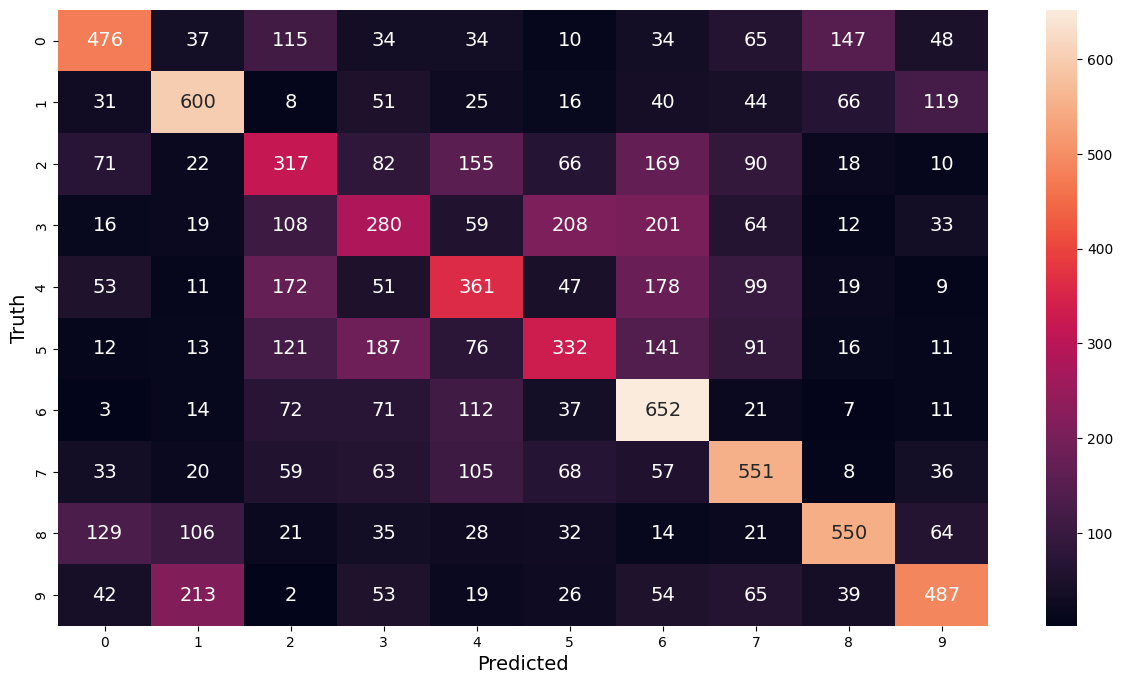

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=np.argmax(y_test, axis=1), predictions=predicted_labels)

plt.figure(figsize=[15, 8])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted') 
plt.ylabel('Truth')
plt.show()


# #Remarques :

    Ce code charge un ensemble d'IMAGE, divise les données en entrées (X) et en sorties (y), puis utilise un percetron multi-couchee de pour prédire les sorties à partir des entrées.
    Le modèle utilise une architecture du perceptron multi-couche avec 6 couches cachées, des fonctions d'activation ReLU,sigmoid et tangente hyperbolique à la sortie.
    La perte est calculée à l'aide de la perte d'entropie croisée binaire (Binary Cross Entropy Loss) et le modèle est entraîné à l'aide de l'algorithme d'optimisation Adam.
    La précision du modèle est calculée en comparant les prédictions avec les étiquettes réelles et en calculant le pourcentage de prédictions correctes.
    Enfin, le modèle est utilisé pour faire des prédictions de classe pour les cinq premiers exemples dans l'ensemble de données.

In [ ]:
# Sauvegarder le modèle au format HDF5
model.save('~/Documents/datascince/IA/modele_pml.h5')

NameError: name 'model' is not defined